# Entrainer un réseau de neurones avec Keras

### Objectif:
- Apprendre un réseau de neurones avec `tensorflow` et Keras

### Jeu de données:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [ ]:
%matplotlib inline
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [ ]:
digits.images[50]

array([[ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  8., 14.,  4.,  0.],
       [ 0.,  0.,  6.,  2.,  3., 13.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  1., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  8., 16., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 14., 16., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12., 13.,  3.,  0.]])

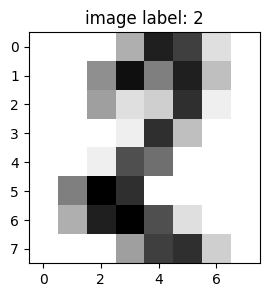

In [ ]:
sample_index = 50
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
import pandas as pd
rep = pd.DataFrame(digits.target)

In [ ]:
rep.value_counts()

,count
0,
3,183
1,182
5,182
4,181
6,181
9,180
7,179
0,178
2,177


## Séparation apprentissage / test


In [ ]:
from sklearn.model_selection import train_test_split


data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1527, 64), (1527,), (270, 64), (270,))

## Préparation des données

Normalisation des données

In [ ]:
from sklearn import preprocessing


# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Affichage des données transformées

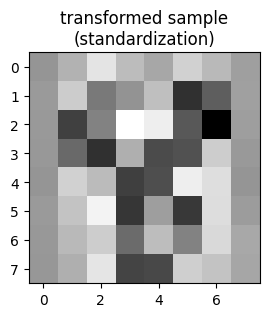

In [ ]:
sample_index = 50
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

On peut retourner à l'image initiale

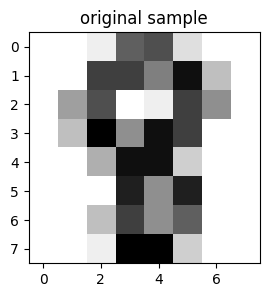

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index].reshape((1,-1))).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [ ]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [ ]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


In [ ]:
y_train[:10]

array([2, 9, 5, 1, 6, 9, 0, 3, 6, 0], dtype=int32)

## Préparation de la cible

Utilisation de one-hot

In [ ]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

## Construction d'un réseau de neurones simple avec keras

### Un premier modèle avec Keras

Nous pouvons maintenant construire notre premier réseau de neurones en utilisant l'API de Keras:

- d'abord nous définissons le modèle en empilant des couches avec les bonnes dimensions
- puis on définit une fonction de perte et on branche l'optimiseur SGD
- puis nous alimentons le modèle avec les données d'apprentissage pour un nombre fixe d'époques

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 10

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5344 - loss: 1.5209 - val_accuracy: 0.9314 - val_loss: 0.4001
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9323 - loss: 0.3484 - val_accuracy: 0.9542 - val_loss: 0.2685
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9582 - loss: 0.2264 - val_accuracy: 0.9510 - val_loss: 0.2152
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9678 - loss: 0.1709 - val_accuracy: 0.9575 - val_loss: 0.1802
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9748 - loss: 0.1472 - val_accuracy: 0.9608 - val_loss: 0.1622
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9827 - loss: 0.1163 - val_accuracy: 0.9641 - val_loss: 0.1504
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9868 - loss: 0.1062 - val_accuracy: 0.9575 - val_loss: 0.1423
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9871 - loss: 0.0905 - val_accuracy: 0.9706 - val_loss

### Visualisation de la convergence

In [ ]:
history.history

{'accuracy': [0.7207207083702087,
  0.9344799518585205,
  0.9590499401092529,
  0.9656019806861877,
  0.9762489795684814,
  0.9795249700546265,
  0.9836199879646301,
  0.9852579832077026,
  0.9885339736938477,
  0.9901719689369202,
  0.9893530011177063,
  0.99344801902771,
  0.9942669868469238,
  0.9950860142707825,
  0.9950860142707825],
 'loss': [0.9944454431533813,
  0.3268868327140808,
  0.21962633728981018,
  0.17034661769866943,
  0.14104366302490234,
  0.11960571259260178,
  0.10528574138879776,
  0.09390821307897568,
  0.08392596244812012,
  0.07568682730197906,
  0.07371460646390915,
  0.06347253918647766,
  0.058244410902261734,
  0.054083116352558136,
  0.051401544362306595],
 'val_accuracy': [0.9313725233078003,
  0.9542483687400818,
  0.9509803652763367,
  0.9575163125991821,
  0.9607843160629272,
  0.9640522599220276,
  0.9575163125991821,
  0.970588207244873,
  0.9673202633857727,
  0.9575163125991821,
  0.970588207244873,
  0.970588207244873,
  0.970588207244873,
  0.97

In [ ]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

On rassemble tout dans un DataFrame

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.720721,0.994445,0.931373,0.400083,0
1,0.934480,0.326887,0.954248,0.268531,1
2,0.959050,0.219626,0.950980,0.215221,2
3,0.965602,0.170347,0.957516,0.180194,3
4,0.976249,0.141044,0.960784,0.162170,4
5,0.979525,0.119606,0.964052,0.150371,5
6,0.983620,0.105286,0.957516,0.142306,6
7,0.985258,0.093908,0.970588,0.129175,7
8,0.988534,0.083926,0.967320,0.125299,8
9,0.990172,0.075687,0.957516,0.146968,9


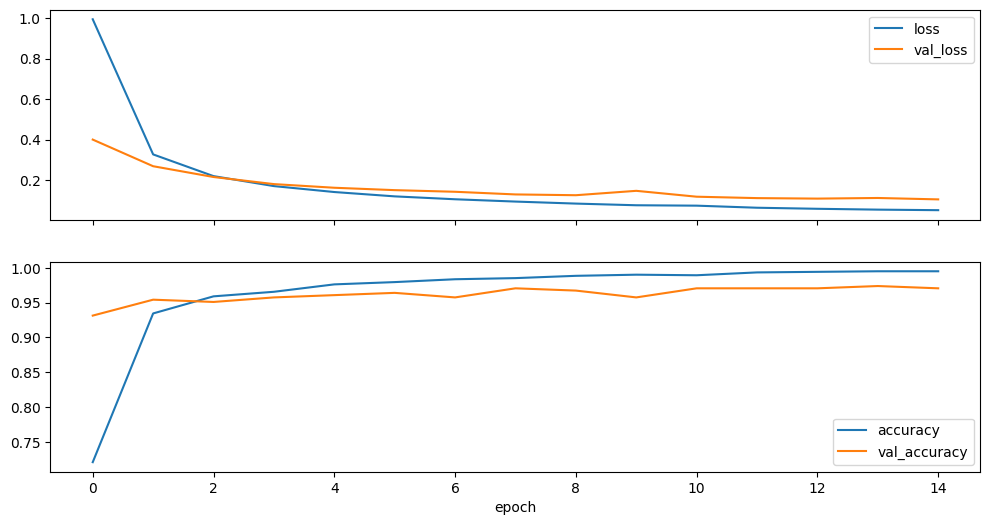

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

### **Exercices: Impact de l'Optimizer**

- Essayez de diminuer la valeur du taux d'apprentissage de 10 ou 100. Qu'observez-vous?

- Essayez d'augmenter la valeur du taux d'apprentissage pour faire diverger l'optimisation.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 10

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0866 - loss: 2.5127 - val_accuracy: 0.0915 - val_loss: 2.4358
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0982 - loss: 2.4039 - val_accuracy: 0.1242 - val_loss: 2.3360
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1251 - loss: 2.3085 - val_accuracy: 0.1471 - val_loss: 2.2409
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1450 - loss: 2.2419 - val_accuracy: 0.1667 - val_loss: 2.1512
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2066 - loss: 2.1397 - val_accuracy: 0.2059 - val_loss: 2.0659
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2467 - loss: 2.0255 - val_accuracy: 0.2386 - val_loss: 1.9856
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2760 - loss: 1.9716 - val_accuracy: 0.2745 - val_loss: 1.9096
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3280 - loss: 1.8824 - val_accuracy: 0.3137 - val_loss: 1.8375
Ep

In [ ]:
import pandas as pd

history_df_lr_100 = pd.DataFrame(history.history)
history_df_lr_100["epoch"] = history.epoch
history_df_lr_100

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.080262,2.497783,0.091503,2.435828,0
1,0.105651,2.393149,0.124183,2.336025,1
2,0.131040,2.294634,0.147059,2.240858,2
3,0.166257,2.201593,0.166667,2.151219,3
4,0.206388,2.113723,0.205882,2.065924,4
5,0.244062,2.029944,0.238562,1.985574,5
6,0.293202,1.951551,0.274510,1.909639,6
7,0.336609,1.877699,0.313726,1.837466,7
8,0.374283,1.808054,0.379085,1.770512,8
9,0.411957,1.742730,0.408497,1.706125,9


**Réponse :** Quand on diminue le taux d'apprentissage, le modèle apprend très lentement, ce qui fait qu'about du meme nombre d'epoch, le modèle n'a pas encore convergé.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 10

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.99),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7576 - loss: 0.7104 - val_accuracy: 0.9542 - val_loss: 0.1659
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9564 - loss: 0.1129 - val_accuracy: 0.9314 - val_loss: 0.2340
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9548 - loss: 0.1255 - val_accuracy: 0.9706 - val_loss: 0.0947
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0241 - val_accuracy: 0.9739 - val_loss: 0.0840
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9994 - loss: 0.0158 - val_accuracy: 0.9771 - val_loss: 0.0743
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.9804 - val_loss: 0.0754
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9804 - val_loss: 0.0714
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9804 - val_loss: 0.0726
Ep

In [ ]:
history_df_lr_09 = pd.DataFrame(history.history)
history_df_lr_09["epoch"] = history.epoch
history_df_lr_09

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.877150,0.378896,0.954248,0.165864,0
1,0.959050,0.121638,0.931373,0.234010,1
2,0.969697,0.089505,0.970588,0.094707,2
3,0.996724,0.026979,0.973856,0.084041,3
4,0.998362,0.016137,0.977124,0.074281,4
5,1.000000,0.010520,0.980392,0.075403,5
6,1.000000,0.008874,0.980392,0.071418,6
7,1.000000,0.006431,0.980392,0.072578,7
8,1.000000,0.005722,0.983660,0.074048,8
9,1.000000,0.004756,0.973856,0.074899,9


**Réponse** : quand le lr a augmenté, le modèle converge rapidement, toutefois au bout d'un moment (epoch 7) le train loss diminue mais la val loss commence à augmenter et diminuer, en meme temps la val accuracy diminue, ceci indique que la solution n'est pas stable (des oscilliations), saute pas-dessus du minimum au lieu de s'approcher.

  - Remplacez l'optimiseur SGD par l'optimiseur Adam de keras et exécutez-le avec les paramètres par défaut.

- Ajoutez une autre couche cachée et utilisez le "Rectified Linear Unit" pour chaque couche cachée. Pouvez-vous toujours entraîner le modèle avec Adam avec son taux d'apprentissage par défaut ?

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 10

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3622 - loss: 1.9099 - val_accuracy: 0.8137 - val_loss: 0.8192
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8510 - loss: 0.7046 - val_accuracy: 0.8954 - val_loss: 0.4794
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9205 - loss: 0.4247 - val_accuracy: 0.9248 - val_loss: 0.3476
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9495 - loss: 0.2863 - val_accuracy: 0.9477 - val_loss: 0.2812
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9572 - loss: 0.2347 - val_accuracy: 0.9575 - val_loss: 0.2403
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9729 - loss: 0.1701 - val_accuracy: 0.9575 - val_loss: 0.2094
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.1595 - val_accuracy: 0.9641 - val_loss: 0.1901
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9716 - loss: 0.1489 - val_accuracy: 0.9706 - val_loss: 0.1749
Ep

In [ ]:
history_df_adam = pd.DataFrame(history.history)
history_df_adam["epoch"] = history.epoch
history_df_adam

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.533989,1.537487,0.813725,0.819214,0
1,0.870598,0.628558,0.895425,0.479353,1
2,0.928747,0.391784,0.924837,0.347567,2
3,0.946765,0.283171,0.947712,0.281197,3
4,0.959869,0.222669,0.957516,0.240266,4
5,0.964783,0.183114,0.957516,0.209401,5
6,0.974611,0.154300,0.964052,0.190104,6
7,0.976249,0.132297,0.970588,0.174892,7
8,0.978706,0.116233,0.973856,0.162542,8
9,0.981982,0.102872,0.980392,0.150263,9


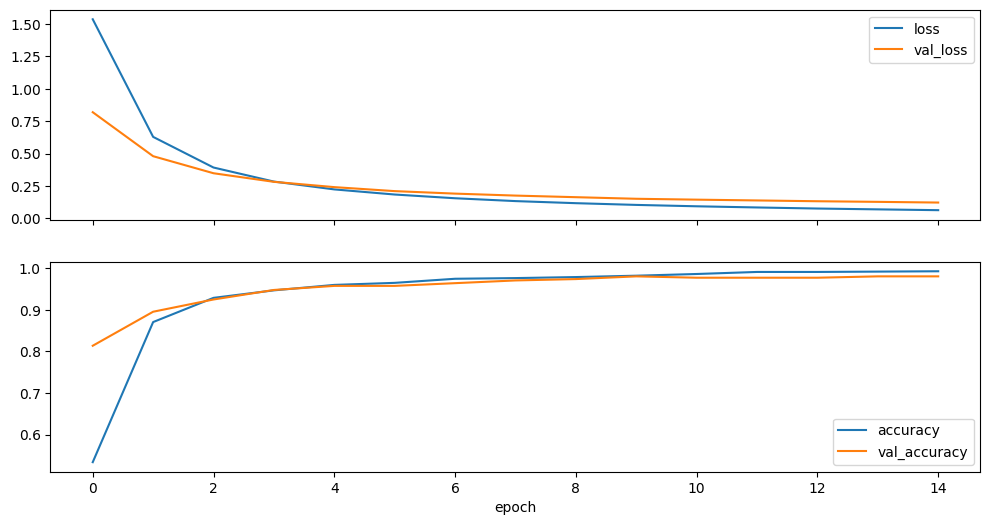

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df_adam.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df_adam.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);


**Réponse :**
Adam donne des meilleurs résultats, une val accuracy. NB le lr par défaut est 0.001.
Pour un lr plus élevé. L'optimisateur SGD est meilleur que Adam pour un lr = 0.1, le Adam semble aussi pas stable. Utiliser Adam avec des taux de lr basse pour avoir de bon résultats.   

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim1 = 100
hidden_dim2 = 50

output_dim = 10

model = Sequential()
model.add(Dense(hidden_dim1, input_dim=input_dim, activation="relu"))
model.add(Dense(hidden_dim2, activation="relu"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3853 - loss: 1.9434 - val_accuracy: 0.8039 - val_loss: 0.9631
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8714 - loss: 0.7659 - val_accuracy: 0.9216 - val_loss: 0.4210
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9498 - loss: 0.3310 - val_accuracy: 0.9444 - val_loss: 0.2717
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9687 - loss: 0.1889 - val_accuracy: 0.9641 - val_loss: 0.1998
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9780 - loss: 0.1225 - val_accuracy: 0.9673 - val_loss: 0.1688
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9868 - loss: 0.0939 - val_accuracy: 0.9706 - val_loss: 0.1476
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9907 - loss: 0.0715 - val_accuracy: 0.9706 - val_loss: 0.1362
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9943 - loss: 0.0560 - val_accuracy: 0.9771 - val_loss: 0.1247
Ep

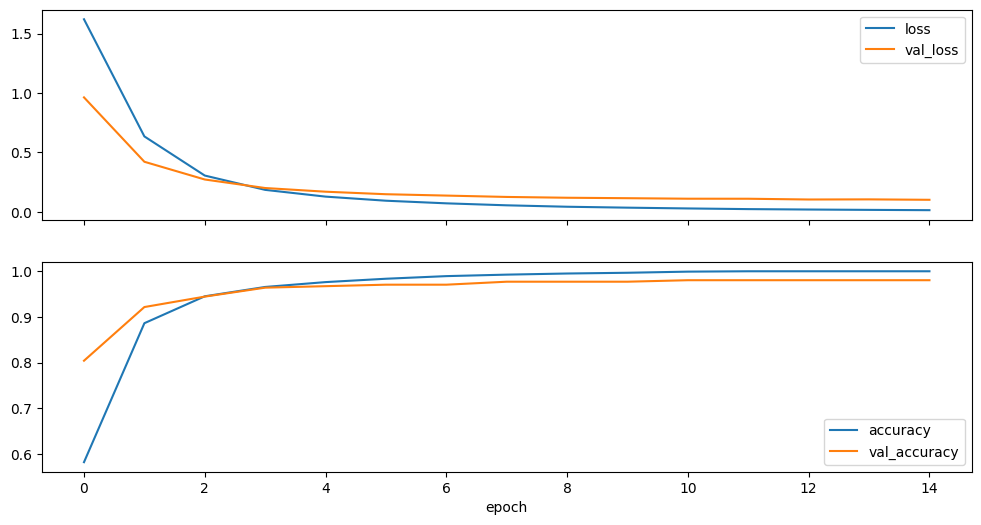

In [ ]:
history_df_adam = pd.DataFrame(history.history)
history_df_adam["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df_adam.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df_adam.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

Le modèle se stabilise et converge rapidement.

### Exercice:

- Calculer les prédictions sur l'ensemble de test en utilisant `model.predict_classes (...)`

- Calculer le pourcentage de bien calssé sur l'ensemble de test.

In [ ]:
model.predict(X_test).shape

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(270, 10)

In [ ]:
y_pred = model.predict(X_test)
y_classes = np.argmax(y_pred, axis=1)
y_classes

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([2, 4, 7, 9, 1, 1, 5, 6, 2, 5, 0, 2, 0, 5, 4, 8, 7, 0, 3, 6, 8, 1,
       9, 8, 0, 9, 8, 4, 2, 7, 5, 4, 2, 8, 6, 9, 6, 1, 8, 6, 5, 7, 8, 1,
       6, 5, 0, 1, 9, 4, 8, 5, 3, 9, 3, 4, 4, 6, 7, 5, 4, 0, 3, 8, 1, 2,
       6, 8, 6, 8, 1, 7, 4, 7, 4, 1, 7, 0, 8, 8, 5, 2, 0, 3, 7, 4, 2, 7,
       6, 0, 6, 0, 8, 3, 6, 7, 3, 0, 7, 4, 8, 5, 8, 1, 4, 1, 2, 9, 1, 4,
       8, 9, 9, 0, 9, 5, 6, 8, 2, 1, 4, 3, 3, 8, 7, 0, 4, 2, 1, 1, 5, 2,
       5, 6, 9, 1, 2, 7, 6, 0, 9, 2, 1, 8, 8, 2, 1, 4, 2, 4, 1, 5, 9, 3,
       3, 4, 1, 2, 2, 5, 6, 0, 7, 9, 6, 8, 6, 1, 1, 3, 5, 2, 0, 9, 0, 2,
       2, 8, 0, 7, 6, 0, 8, 5, 3, 9, 5, 7, 9, 9, 8, 0, 7, 1, 8, 4, 7, 7,
       4, 0, 8, 1, 4, 0, 8, 8, 6, 5, 0, 1, 6, 2, 0, 4, 7, 5, 3, 7, 3, 4,
       5, 9, 9, 7, 3, 4, 5, 8, 1, 1, 9, 5, 5, 1, 4, 1, 2, 9, 2, 9, 5, 3,
       6, 0, 8, 6, 7, 6, 7, 9, 2, 6, 8, 3, 2, 8, 5, 5, 4, 2, 2, 5, 0, 5,
       2, 8, 8, 8, 9, 0])

In [ ]:
y_pred

array([[1.3257138e-10, 6.0388888e-06, 9.9997377e-01, ..., 4.3912278e-06,
        5.7650931e-07, 5.2087938e-09],
       [4.7507683e-06, 1.7998131e-07, 1.5671063e-08, ..., 1.8265164e-05,
        2.2894389e-08, 1.6373822e-10],
       [9.8515478e-08, 1.0065901e-04, 7.6971322e-05, ..., 9.9968410e-01,
        5.9090157e-06, 5.6903509e-06],
       ...,
       [3.8959464e-04, 5.2740341e-03, 8.9062154e-03, ..., 1.1625084e-01,
        8.5726279e-01, 3.7119689e-04],
       [2.9588511e-04, 1.0451837e-04, 8.4151947e-07, ..., 3.9765844e-05,
        3.4845449e-05, 9.9211520e-01],
       [9.9988663e-01, 1.0022685e-06, 1.8402192e-05, ..., 7.1528888e-07,
        1.4717549e-06, 3.0332913e-05]], dtype=float32)

In [ ]:
accuracy = 100 * np.sum(y_test == y_classes)/len(y_classes)
print(f"Accuracy sur le test : {accuracy:.2f}%")

Accuracy sur le test : 98.52%
